# This is a semester break project only

Creator: Roj Gian Gorospe - UST CICS BS Computer Science 

- Compile multiple datasets for more generalization
- Make all dataset grouped and uniformed
- Simple EDA of data
- Make Split Ratio of 70/20/10 Train, Valid, Test (ADD LIMIT FOR LESSER TIME TRAINING)
- Data Augmentation for training data
- Preprocessing of all data
- Optuna Framework for best hyper parameters
- Apply optimal hyperparameters
- Model Evaluation

## Uniformity of dataset

In [7]:
import os
from PIL import Image
from tqdm import tqdm

# Directory containing subfolders with images
base_dir = r"D:\WORK\Baybayin App Project\dataset"

def convert_to_jpg(base_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in tqdm(files, desc=f"Processing images in {root}"):
            file_path = os.path.join(root, file)
            try:
                # Open image and convert to RGB
                with Image.open(file_path) as img:
                    rgb_img = img.convert("RGB")
                    # Replace the file extension with .jpg
                    new_file_path = os.path.splitext(file_path)[0] + ".jpg"
                    # Save the converted image
                    rgb_img.save(new_file_path, "JPEG")
                    # Remove the original file if it was not already a jpg
                    if file_path != new_file_path:
                        os.remove(file_path)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

if __name__ == "__main__":
    convert_to_jpg(base_dir)


Processing images in D:\WORK\Baybayin App Project\dataset: 0it [00:00, ?it/s]
Processing images in D:\WORK\Baybayin App Project\dataset\a: 100%|██████████| 2486/2486 [00:23<00:00, 104.20it/s]
Processing images in D:\WORK\Baybayin App Project\dataset\b: 100%|██████████| 1339/1339 [00:15<00:00, 84.93it/s] 
Processing images in D:\WORK\Baybayin App Project\dataset\ba: 100%|██████████| 3282/3282 [00:29<00:00, 111.01it/s]
Processing images in D:\WORK\Baybayin App Project\dataset\be_bi: 100%|██████████| 1283/1283 [00:13<00:00, 96.63it/s] 
Processing images in D:\WORK\Baybayin App Project\dataset\bo_bu: 100%|██████████| 553/553 [00:05<00:00, 98.51it/s] 
Processing images in D:\WORK\Baybayin App Project\dataset\d: 100%|██████████| 1505/1505 [00:15<00:00, 95.70it/s] 
Processing images in D:\WORK\Baybayin App Project\dataset\da: 100%|██████████| 3667/3667 [00:38<00:00, 95.41it/s] 
Processing images in D:\WORK\Baybayin App Project\dataset\de_di: 100%|██████████| 1434/1434 [00:13<00:00, 103.40it/s

While making each image in the dataset be uniformed, it was decided to get the class which has the minimum number of images and make it the limit for the images in each class. It was also a better option since training large amounts of images can take a long time considering the laptop of the creator (Roj Gian)

Since the dataset are collected from multiple data sources, a duplicate may happen.

In [13]:
import hashlib

def calculate_hash(image_path):
    """Calculate the MD5 hash of an image file."""
    hash_md5 = hashlib.md5()
    with open(image_path, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def find_duplicate_images(dataset_directory):
    """Find and count duplicate images per class."""
    duplicates_count = {}
    
    for class_folder in os.listdir(dataset_directory):
        class_path = os.path.join(dataset_directory, class_folder)
        if os.path.isdir(class_path):
            hash_set = set()
            duplicates = 0
            
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    img_hash = calculate_hash(image_path)
                    if img_hash in hash_set:
                        duplicates += 1
                    else:
                        hash_set.add(img_hash)
                except Exception as e:
                    pass  # Skip files that cannot be read
            
            duplicates_count[class_folder] = duplicates
    
    return duplicates_count

# Use the function to find duplicates in the dataset
dataset_directory = r"D:\WORK\Baybayin App Project\dataset"
duplicates_count = find_duplicate_images(dataset_directory)

# Display the results
duplicates_df = pd.DataFrame({
    "Class": duplicates_count.keys(),
    "Duplicate Count": duplicates_count.values()
}).sort_values(by="Duplicate Count", ascending=False)

# Display the duplicate counts
print(duplicates_df)


      Class  Duplicate Count
17    ho_hu              972
29    mo_mu              945
50    to_tu              943
58    yo_yu              940
42    po_pu              921
21    ko_ku              868
54    wo_wu              849
46    so_su              841
13    go_gu              841
36  ngo_ngu              825
8     do_du              807
37    no_nu              805
4     bo_bu              771
32    ne_ni              527
34      nga              302
40       pa              268
0         a              268
48       ta              267
15       ha              201
25    lo_lu              200
6        da              197
38      o_u              183
14        h              171
2        ba              164
52       wa              156
56       ya              127
19       ka              100
44       sa               92
9       e_i               55
3     be_bi               49
7     de_di               43
20    ke_ki               38
16    he_hi               37
45    se_si   

In [14]:
def delete_duplicate_images(dataset_directory):
    """Find and delete duplicate images per class."""
    for class_folder in os.listdir(dataset_directory):
        class_path = os.path.join(dataset_directory, class_folder)
        if os.path.isdir(class_path):
            hash_set = set()
            
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    img_hash = calculate_hash(image_path)
                    if img_hash in hash_set:
                        os.remove(image_path)  # Delete the duplicate image
                    else:
                        hash_set.add(img_hash)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

# Call the function to delete duplicate images
delete_duplicate_images(dataset_directory)

print("Duplicate images have been deleted.")


Duplicate images have been deleted.


In [10]:
import os
from collections import defaultdict

output_directory = r"D:\WORK\Baybayin App Project\dataset"
# Initialize a dictionary to store the count of images per class
class_counts = defaultdict(int)

# Iterate through each class directory in the output directory
for class_name in os.listdir(output_directory):
  class_path = os.path.join(output_directory, class_name)
  if os.path.isdir(class_path):
    # Count the number of images in the class directory
    class_counts[class_name] += len([img for img in os.listdir(class_path) if img.endswith('.jpg')])

# Print the counts
for class_name, count in class_counts.items():
  print(f"{class_name}: {count} images")

# Find and print the class with the least number of images
least_class = min(class_counts, key=class_counts.get)
print(f"Class with the least number of images: {least_class} with {class_counts[least_class]} images")

a: 2486 images
b: 340 images
ba: 3282 images
be_bi: 1283 images
bo_bu: 553 images
d: 511 images
da: 3667 images
de_di: 1434 images
do_du: 673 images
e_i: 2656 images
g: 316 images
ga: 3772 images
ge_gi: 1283 images
go_gu: 493 images
h: 333 images
ha: 3494 images
he_hi: 1286 images
ho_hu: 344 images
k: 264 images
ka: 3743 images
ke_ki: 1254 images
ko_ku: 400 images
l: 1331 images
la: 3557 images
le_li: 1267 images
lo_lu: 1102 images
m: 1359 images
ma: 3477 images
me_mi: 1293 images
mo_mu: 387 images
n: 1310 images
na: 3632 images
ne_ni: 771 images
ng: 1343 images
nga: 3386 images
nge_ngi: 1303 images
ngo_ngu: 490 images
no_nu: 482 images
o_u: 2455 images
p: 1362 images
pa: 3283 images
pe_pi: 1323 images
po_pu: 443 images
s: 1330 images
sa: 3357 images
se_si: 1282 images
so_su: 480 images
t: 1334 images
ta: 3342 images
te_ti: 1314 images
to_tu: 375 images
w: 1357 images
wa: 3507 images
we_wi: 1312 images
wo_wu: 511 images
y: 1368 images
ya: 3432 images
ye_yi: 1296 images
yo_yu: 387 image

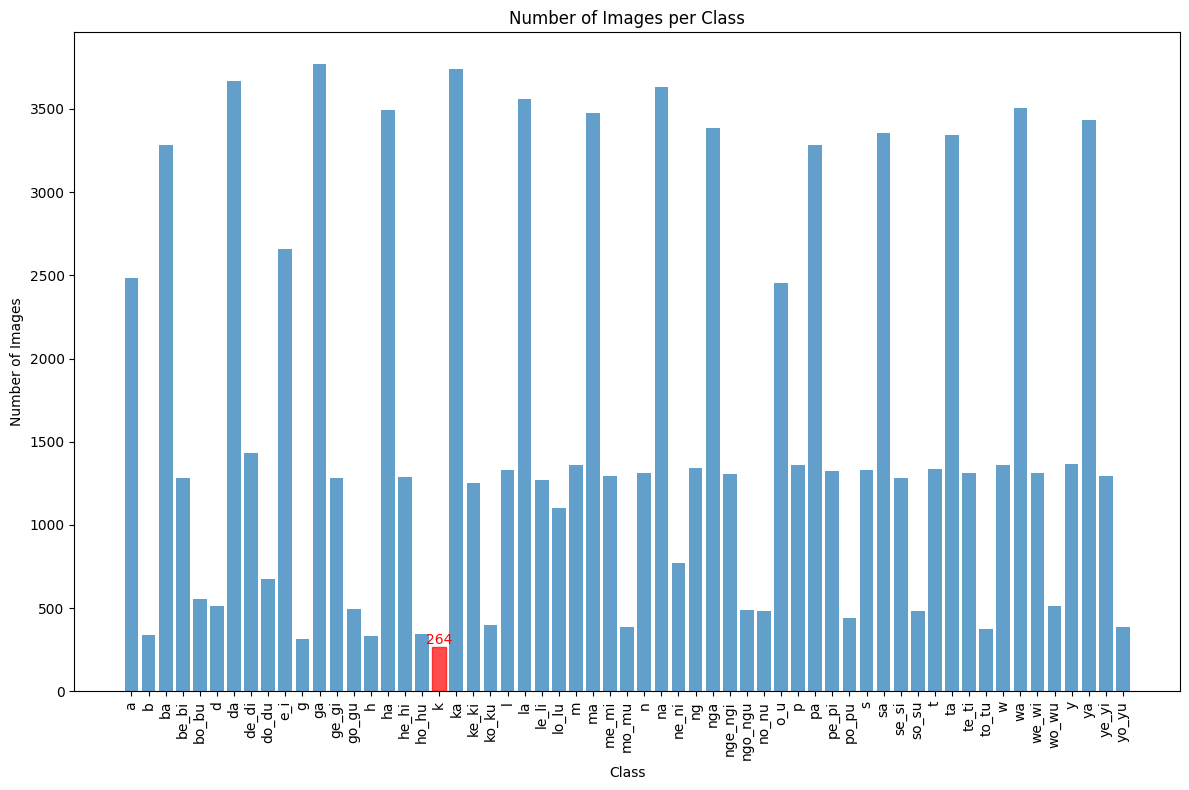

In [12]:
import matplotlib.pyplot as plt

# Visualization: Number of classes
plt.figure(figsize=(12, 8))
bars = plt.bar(class_counts.keys(), class_counts.values(), alpha=0.7)
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")

# Highlight the class with the least number of images
for bar in bars:
  if bar.get_x() + bar.get_width() / 2 == list(class_counts.keys()).index(least_class):
    bar.set_color('r')
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()


In [13]:
import os

# Define the dataset path
dataset_path = "D:/WORK/Baybayin App Project/dataset"

# Count all images in the folder and its subfolders
total_images = 0
for root, dirs, files in os.walk(dataset_path):
  total_images += len([f for f in files if f.endswith(('.jpg', '.png'))])

print(f"Total number of images in the dataset: {total_images}")

Total number of images in the dataset: 95207


In [14]:
# Checking the directory structure and extracting unique image file types

# Collect all unique image extensions
unique_extensions = set()

# Iterate over the folders in the dataset directory
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        unique_extensions.add(ext)

# Display the unique image file types
unique_extensions


{'.jpg'}

In [16]:
import os
import random
import shutil
from tqdm import tqdm

# Paths
source_dir = r"D:\WORK\Baybayin App Project\dataset"
destination_dir = r"D:\WORK\Baybayin App Project\sampled_dataset"

# Number of images per class
num_images_per_class = 264

def create_sampled_dataset(source_dir, destination_dir, num_images_per_class):
    # Ensure the destination directory exists
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Iterate through each subfolder in the source directory
    for class_folder in tqdm(os.listdir(source_dir), desc="Processing classes"):
        class_path = os.path.join(source_dir, class_folder)
        
        # Ensure the current item is a directory
        if os.path.isdir(class_path):
            # Create corresponding folder in the destination directory
            dest_class_path = os.path.join(destination_dir, class_folder)
            os.makedirs(dest_class_path, exist_ok=True)

            # Get a list of all image files in the current class folder
            image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
            
            # Randomly select the required number of images
            selected_files = random.sample(image_files, min(num_images_per_class, len(image_files)))

            # Copy the selected images to the destination class folder
            for file in selected_files:
                src_file = os.path.join(class_path, file)
                dest_file = os.path.join(dest_class_path, file)
                shutil.copy(src_file, dest_file)

if __name__ == "__main__":
    create_sampled_dataset(source_dir, destination_dir, num_images_per_class)


Processing classes: 100%|██████████| 59/59 [02:38<00:00,  2.69s/it]


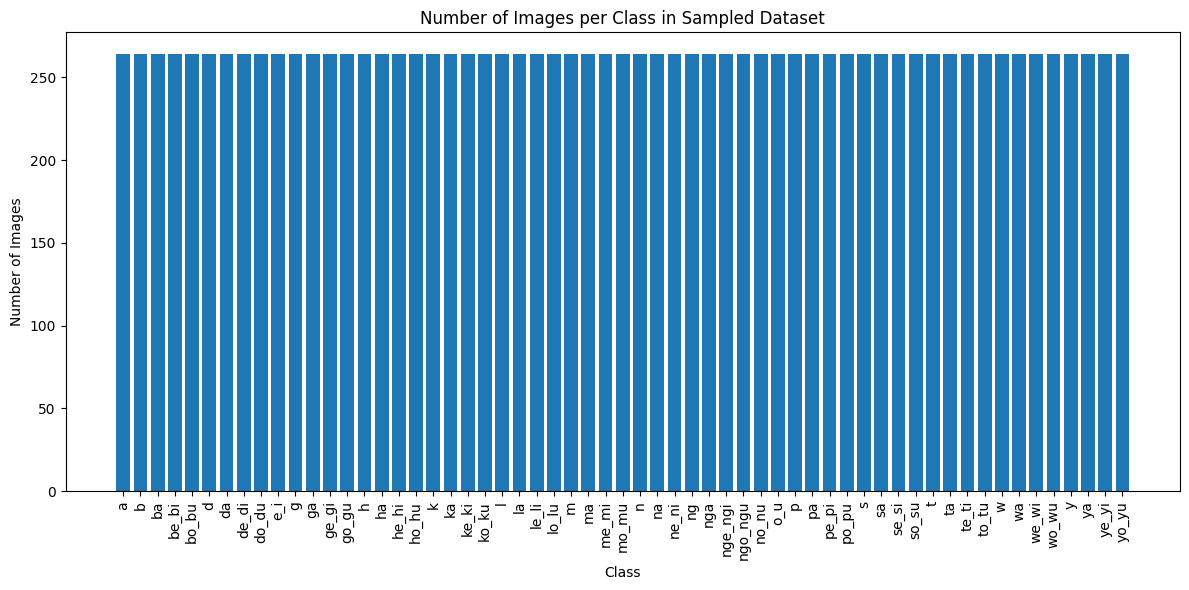

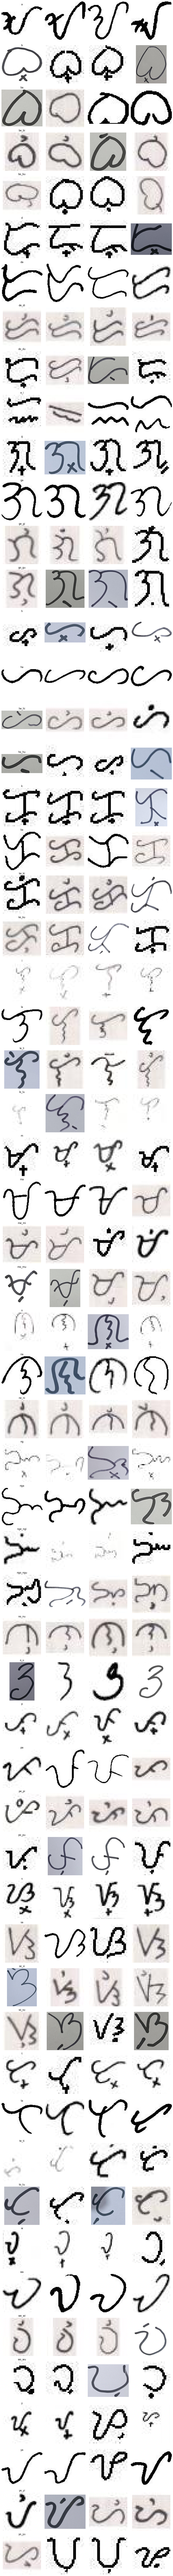

In [17]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the sampled dataset
sampled_dir = r"D:\WORK\Baybayin App Project\sampled_dataset"

def visualize_sampled_dataset(sampled_dir):
    # Collect information about the sampled dataset
    class_counts = {}
    sample_images = {}

    for class_folder in os.listdir(sampled_dir):
        class_path = os.path.join(sampled_dir, class_folder)
        if os.path.isdir(class_path):
            images = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
            class_counts[class_folder] = len(images)
            # Randomly select 4 images for visualization
            sample_images[class_folder] = random.sample(images, min(4, len(images)))

    # Bar chart: Number of images per class
    plt.figure(figsize=(12, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title("Number of Images per Class in Sampled Dataset")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Grid visualization: Sample images from each class
    plt.figure(figsize=(12, len(sample_images) * 3))
    for idx, (class_name, images) in enumerate(sample_images.items()):
        for i, img_path in enumerate(images):
            plt.subplot(len(sample_images), 4, idx * 4 + i + 1)
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis("off")
            if i == 0:
                plt.title(class_name)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_sampled_dataset(sampled_dir)


# Splitting of Dataset

Since the dataset started around 110k+ number of images cut down to 95k+ due to duplicate images, cut down again to 15,576 due to the minimum number of class, and has 59 classes, a splitting of dataset is now done with 70/20/10 split ratio. A limit (minimum number) for each class was introduced to take into account the training time it will take.

In [22]:
import os
import random
import shutil

def split_dataset_fixed(dataset_directory, output_directory):
    """
    Split the dataset with exactly 264 images per class into train (185), val (53), and test (26).
    """
    # Explicit counts
    train_count = 185
    val_count = 53
    test_count = 26

    # Ensure output directories exist
    train_dir = os.path.join(output_directory, "train")
    val_dir = os.path.join(output_directory, "val")
    test_dir = os.path.join(output_directory, "test")

    for directory in [train_dir, val_dir, test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Loop through each class folder
    for class_folder in os.listdir(dataset_directory):
        class_path = os.path.join(dataset_directory, class_folder)

        if os.path.isdir(class_path):
            # Create corresponding subdirectories in train, val, and test folders
            for split_dir in [train_dir, val_dir, test_dir]:
                split_class_path = os.path.join(split_dir, class_folder)
                if not os.path.exists(split_class_path):
                    os.makedirs(split_class_path)

            # List all images in the class folder
            images = os.listdir(class_path)
            if len(images) != 264:
                raise ValueError(f"Class '{class_folder}' does not have exactly 264 images.")
            
            random.shuffle(images)

            # Split the images
            train_images = images[:train_count]
            val_images = images[train_count:train_count + val_count]
            test_images = images[train_count + val_count:train_count + val_count + test_count]

            # Move images to respective directories
            for image_file in train_images:
                shutil.copy(os.path.join(class_path, image_file), os.path.join(train_dir, class_folder, image_file))
            
            for image_file in val_images:
                shutil.copy(os.path.join(class_path, image_file), os.path.join(val_dir, class_folder, image_file))
            
            for image_file in test_images:
                shutil.copy(os.path.join(class_path, image_file), os.path.join(test_dir, class_folder, image_file))

if __name__ == "__main__":
    # Paths to the sampled dataset and output split directory
    sampled_dataset_directory = r"D:\WORK\Baybayin App Project\sampled_dataset"
    output_split_directory = r"D:\WORK\Baybayin App Project\split_sampled_dataset"

    # Split the dataset
    split_dataset_fixed(sampled_dataset_directory, output_split_directory)

    print("Dataset has been split into train (185), val (53), and test (26) sets.")


Dataset has been split into train (185), val (53), and test (26) sets.


# Split Dataset Loading

In [30]:
import os
from collections import defaultdict

# Paths to the split dataset
new_dataset_path = r"D:\WORK\Baybayin App Project\split_sampled_dataset"
splits = ["train", "val", "test"]

# Initialize a dictionary to store the count of images per split
split_counts = defaultdict(int)

# Iterate through each split directory
for split in splits:
    split_path = os.path.join(new_dataset_path, split)
    # Iterate through each class subdirectory
    for class_name in os.listdir(split_path):
        class_split_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_split_path):
            # Count the number of images in the class subdirectory
            split_counts[split] += len([img for img in os.listdir(class_split_path) if img.endswith(('.jpg'))])

# Print the counts
for split, count in split_counts.items():
    print(f"{split}: {count} images")


train: 10915 images
val: 3127 images
test: 1534 images


# Data Augmentation and Pre-processing

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import optuna
import os

# Paths to dataset folders
train_dir = r"D:\WORK\Baybayin App Project\split_sampled_dataset\train"
val_dir = r"D:\WORK\Baybayin App Project\split_sampled_dataset\val"
test_dir = r"D:\WORK\Baybayin App Project\split_sampled_dataset\test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 10915 images belonging to 59 classes.
Found 3127 images belonging to 59 classes.


## Optuna Study Framework (MAX TRIAL: 20)

In [33]:
# Define the objective function for Optuna
def objective(trial):
    model = Sequential()

    # Hyperparameters to tune
    num_conv_layers = trial.suggest_int("num_conv_layers", 1, 3)
    filter_count = trial.suggest_categorical("filter_count", [32, 64, 128])
    kernel_size = trial.suggest_categorical("kernel_size", [3, 5])
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)

    # Build CNN with dynamic hyperparameters
    for _ in range(num_conv_layers):
        model.add(Conv2D(filter_count, (kernel_size, kernel_size), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(train_data.num_classes, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_data,
        epochs=10,
        validation_data=val_data,
        verbose=0
    )

    # Return the validation accuracy
    val_accuracy = max(history.history['val_accuracy'])
    return val_accuracy

# Run Optuna optimization with progress bar
class TQDMOptunaCallback(optuna.integration.TFKerasPruningCallback):
    def __init__(self, iterator):
        self.iterator = iterator

    def __call__(self, study, trial):
        self.iterator.update(1)

study = optuna.create_study(direction="maximize")
with tqdm(total=20) as pbar:
    study.optimize(lambda trial: objective(trial), n_trials=20, callbacks=[TQDMOptunaCallback(pbar)])

# Get the best hyperparameters
print("Best Hyperparameters:", study.best_params)

# Build and train the final model with best hyperparameters
best_params = study.best_params

[I 2025-01-10 20:16:50,814] A new study created in memory with name: no-name-a19cbde9-9180-4f9d-b239-0d082bbb54a2
  0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\rojgi\AppData\Local\Temp\ipykernel_2428\308203479.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
[I 2025-01-10 20:24:46,870] Trial 0 finished with value: 0.1845218986272812 and parameters: {'num_conv_layers': 1, 'filter_count': 64, 'kernel_size': 3, 'dropout_rate': 0.3711223818617785, 'learning_rate': 0.004700439741540202}. Best is trial 0 with value: 0.1845218986272812.
100%|██████████| 20/20 [2:55:19<00:00, 526.00s/it]

Best Hyperparameters: {'num_conv_layers': 3, 'filter_count': 64, 'kernel_size': 5, 'dropout_rate': 0.4224108606868052, 'learning_rate': 0.0007876708560116673}


## MODEL TRAINING

In [34]:
final_model = Sequential()
for _ in range(best_params["num_conv_layers"]):
    final_model.add(Conv2D(best_params["filter_count"], (best_params["kernel_size"], best_params["kernel_size"]), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    final_model.add(MaxPooling2D((2, 2)))

final_model.add(Flatten())
final_model.add(Dropout(best_params["dropout_rate"]))
final_model.add(Dense(train_data.num_classes, activation='softmax'))

final_model.compile(optimizer=Adam(learning_rate=best_params["learning_rate"]), loss='categorical_crossentropy', metrics=['accuracy'])

final_model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)

# Save the final model
final_model.save("final_cnn_model.h5")

# Evaluate on the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

results = final_model.evaluate(test_data)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

Epoch 1/20
342/342 [==============================] - 51s 147ms/step - loss: 3.8688 - accuracy: 0.0567 - val_loss: 3.3163 - val_accuracy: 0.2021
Epoch 2/20
342/342 [==============================] - 52s 151ms/step - loss: 3.2039 - accuracy: 0.1776 - val_loss: 2.1858 - val_accuracy: 0.4029
Epoch 3/20
342/342 [==============================] - 51s 150ms/step - loss: 2.7852 - accuracy: 0.2601 - val_loss: 1.7783 - val_accuracy: 0.5232
Epoch 4/20
342/342 [==============================] - 53s 156ms/step - loss: 2.5055 - accuracy: 0.3188 - val_loss: 1.5107 - val_accuracy: 0.5648
Epoch 5/20
342/342 [==============================] - 51s 149ms/step - loss: 2.2613 - accuracy: 0.3721 - val_loss: 1.3996 - val_accuracy: 0.6015
Epoch 6/20
342/342 [==============================] - 53s 156ms/step - loss: 2.0909 - accuracy: 0.4123 - val_loss: 1.2226 - val_accuracy: 0.6489
Epoch 7/20
342/342 [==============================] - 56s 163ms/step - loss: 1.9590 - accuracy: 0.4369 - val_loss: 1.2054 - val_ac

## MODEL EVALUATION AND TESTING

Found 1534 images belonging to 59 classes.
48/48 [==============================] - 2s 39ms/step


<Figure size 2000x2000 with 0 Axes>

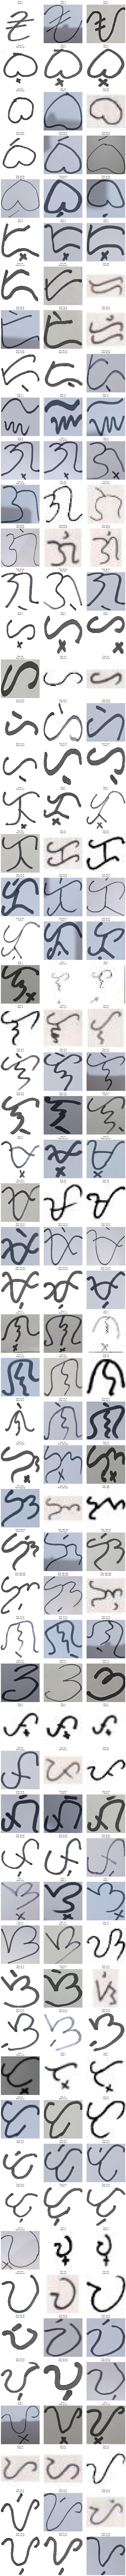

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Paths to dataset folders
test_dir = r"D:\WORK\Baybayin App Project\split_sampled_dataset\test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32

# Data preprocessing for the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Load the trained model
model = tf.keras.models.load_model("final_cnn_model.h5")

# Generate predictions
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Visualize 3 predictions per class
plt.figure(figsize=(20, 20))
class_samples = {class_name: 0 for class_name in class_labels}
num_classes = len(class_labels)
samples_per_class = 3

rows = samples_per_class * num_classes // 3  # Adjust rows for better size
cols = 3
plt.figure(figsize=(cols * 5, rows * 5))

index = 0
for i, (img_batch, _) in enumerate(test_data):
    for j in range(img_batch.shape[0]):
        true_label = class_labels[y_true[index]]
        pred_label = class_labels[y_pred[index]]

        # Show only if we haven't reached the sample count for this class
        if class_samples[true_label] < samples_per_class:
            plt.subplot(rows, cols, sum(class_samples.values()) + 1)
            plt.imshow(img_batch[j])
            plt.title(f"True: {true_label}\nPred: {pred_label}")
            plt.axis('off')

            class_samples[true_label] += 1
            if sum(class_samples.values()) >= rows * cols:
                break
        index += 1
    if sum(class_samples.values()) >= rows * cols:
        break

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 118ms/step


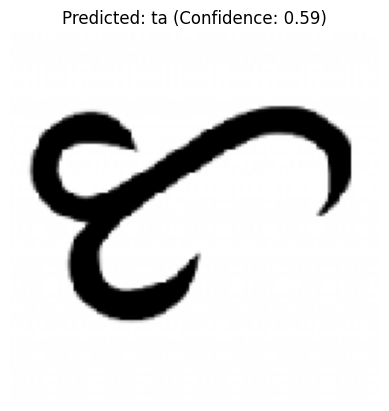

ta: 0.5892
nga: 0.1428
t: 0.0894
e_i: 0.0864
ba: 0.0387
o_u: 0.0208
da: 0.0179
wa: 0.0040
ka: 0.0027
la: 0.0021
ha: 0.0018
te_ti: 0.0011
ma: 0.0006
ga: 0.0005
na: 0.0004
me_mi: 0.0003
yo_yu: 0.0002
pa: 0.0002
ya: 0.0002
to_tu: 0.0002
a: 0.0001
sa: 0.0000
nge_ngi: 0.0000
pe_pi: 0.0000
y: 0.0000
w: 0.0000
do_du: 0.0000
ngo_ngu: 0.0000
go_gu: 0.0000
ng: 0.0000
g: 0.0000
ho_hu: 0.0000
mo_mu: 0.0000
he_hi: 0.0000
po_pu: 0.0000
bo_bu: 0.0000
le_li: 0.0000
de_di: 0.0000
b: 0.0000
h: 0.0000
wo_wu: 0.0000
ye_yi: 0.0000
d: 0.0000
ko_ku: 0.0000
m: 0.0000
k: 0.0000
ge_gi: 0.0000
lo_lu: 0.0000
s: 0.0000
so_su: 0.0000
ke_ki: 0.0000
p: 0.0000
no_nu: 0.0000
we_wi: 0.0000
be_bi: 0.0000
n: 0.0000
se_si: 0.0000
l: 0.0000
ne_ni: 0.0000


In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the trained model
model = tf.keras.models.load_model("final_cnn_model.h5")

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128

# Function to preprocess and predict a new image
def predict_new_image(image_path):
    image = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = img_to_array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class]

    class_labels = list(test_data.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

    # Display probabilities for all classes, ranked descending
    sorted_indices = np.argsort(prediction[0])[::-1]
    for i in sorted_indices:
        print(f"{class_labels[i]}: {prediction[0][i]:.4f}")

# Example usage
image_path = r"D:\WORK\Baybayin App Project\ta.jpg"  # Change this path to your image
predict_new_image(image_path)


1/1 [==============================] - 0s 87ms/step


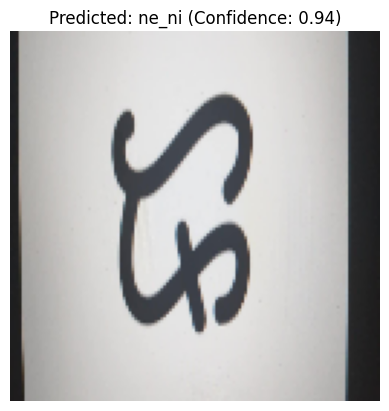

ne_ni: 0.9380
s: 0.0260
b: 0.0080
sa: 0.0064
m: 0.0051
pe_pi: 0.0037
a: 0.0029
no_nu: 0.0022
n: 0.0015
y: 0.0014
se_si: 0.0012
w: 0.0008
so_su: 0.0006
bo_bu: 0.0006
ngo_ngu: 0.0004
p: 0.0002
h: 0.0002
d: 0.0002
na: 0.0001
ke_ki: 0.0001
le_li: 0.0001
po_pu: 0.0001
nga: 0.0001
ye_yi: 0.0000
me_mi: 0.0000
nge_ngi: 0.0000
k: 0.0000
ge_gi: 0.0000
ma: 0.0000
yo_yu: 0.0000
pa: 0.0000
wo_wu: 0.0000
ko_ku: 0.0000
g: 0.0000
be_bi: 0.0000
t: 0.0000
ng: 0.0000
ka: 0.0000
te_ti: 0.0000
ga: 0.0000
lo_lu: 0.0000
go_gu: 0.0000
ba: 0.0000
mo_mu: 0.0000
do_du: 0.0000
la: 0.0000
de_di: 0.0000
we_wi: 0.0000
e_i: 0.0000
ho_hu: 0.0000
wa: 0.0000
to_tu: 0.0000
he_hi: 0.0000
l: 0.0000
ta: 0.0000
ya: 0.0000
ha: 0.0000
da: 0.0000
o_u: 0.0000


In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the trained model
model = tf.keras.models.load_model("final_cnn_model.h5")

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128

# Function to preprocess and predict a new image
def predict_new_image(image_path):
    image = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = img_to_array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class]

    class_labels = list(test_data.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

    # Display probabilities for all classes, ranked descending
    sorted_indices = np.argsort(prediction[0])[::-1]
    for i in sorted_indices:
        print(f"{class_labels[i]}: {prediction[0][i]:.4f}")

# Example usage
image_path = r"D:\WORK\Baybayin App Project\ra.jpg"  # Change this path to your image
predict_new_image(image_path)


In [50]:
from sklearn.metrics import classification_report

# Generate predictions
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

48/48 [==============================] - 2s 40ms/step
              precision    recall  f1-score   support

           a       0.89      0.62      0.73        26
           b       0.84      0.81      0.82        26
          ba       1.00      0.88      0.94        26
       be_bi       0.93      0.96      0.94        26
       bo_bu       0.77      0.88      0.82        26
           d       0.81      0.81      0.81        26
          da       0.88      0.88      0.88        26
       de_di       0.89      0.96      0.93        26
       do_du       0.78      0.81      0.79        26
         e_i       0.96      1.00      0.98        26
           g       0.73      0.92      0.81        26
          ga       0.92      0.85      0.88        26
       ge_gi       1.00      0.88      0.94        26
       go_gu       0.80      0.77      0.78        26
           h       0.76      1.00      0.87        26
          ha       1.00      0.88      0.94        26
       he_hi       0.85    

# RECOMMENDATION
- Since the limit per class is 264, it might have affected the overall performance of the model. Hence, more dataset is recommended for a better generalization and more time for the model to learn patterns.
- A more detailed data augmentation can maybe help the model to learn better since only basic augmentations are applied.

## Investigation
- It was found out that when making the images all uniformed to jpg, there was a bug that lets some images be rewritten thus making it deleted. This will be taken in mind in version 1
- The raw consolidated dataset count is supposed to be 225972 not 110k+